Yoklama kaydedildi: X
Yoklama kaydedildi: X
Yoklama kaydedildi: giray_altinok


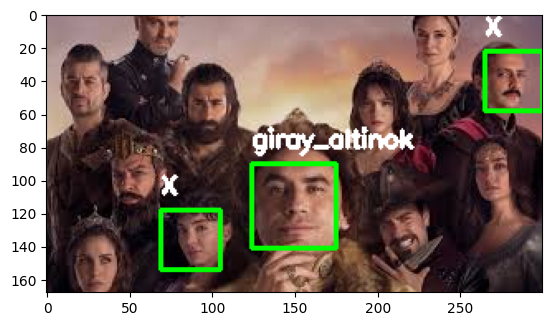

In [11]:
import cv2
import face_recognition
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Öğrencilerin yüz bilgilerini yükleme
def load_known_faces_and_names(known_faces_path):
    known_encodings = []
    known_names = []

    for file_name in os.listdir(known_faces_path):
        if file_name.endswith(".jpg") or file_name.endswith(".png") or file_name.endswith(".jpeg") or file_name.endswith(".webp"):
            image = face_recognition.load_image_file(f"{known_faces_path}/{file_name}")
            encoding = face_recognition.face_encodings(image)
            if encoding:  # Eğer yüz bulunmuşsa
                known_encodings.append(encoding[0])  # İlk yüzü alıyoruz
                known_names.append(os.path.splitext(file_name)[0])  # Dosya adı isim olarak kullanılır
                #print(file_name)
   
    return known_encodings, known_names

# 2. Yoklama kaydı
def mark_attendance(name):
    # Yoklama kaydını CSV dosyasına ekler
    with open("/Users/gokcesoylu/AttendanceSystem/Prens_attendance.csv", "a") as file:  # Tam yol kullanılıyor
        now = datetime.now()
        dt_string = now.strftime("%Y-%m-%d %H:%M:%S")
        file.write(f"{name},{dt_string}\n")
    print(f"Yoklama kaydedildi: {name}")
    

def main():
    known_faces_path = "/Users/gokcesoylu/AttendanceSystem/Prens_known_faces"  # Önceden tanımlı yüzlerin bulunduğu klasör
    known_encodings, known_names = load_known_faces_and_names(known_faces_path)

    # Test için bir hazır görüntü kullanıyoruz.
    test_image_path = "/Users/gokcesoylu/AttendanceSystem/Prens_test_images/prens1.jpeg"  # Test görüntüsü dosya yolu
    test_image = cv2.imread(test_image_path)
    rgb_test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

    # Görüntüdeki yüzleri tanıma
    face_locations = face_recognition.face_locations(rgb_test_image)
    face_encodings = face_recognition.face_encodings(rgb_test_image, face_locations)

    # Yüz tanıma işlemi
    i = 0
    for face_encoding, face_location in zip(face_encodings, face_locations):
        matches = face_recognition.compare_faces(known_encodings, face_encoding)
        name = "X"
        face_distances = face_recognition.face_distance(known_encodings, face_encoding)
        
        # Eşleşen en iyi yüzü seçme
        if len(face_distances) > 0:
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_names[best_match_index]

        # Yoklamayı kaydetme
        mark_attendance(name)
        
        # Tanınan yüzlerin üzerine etiket ekleme
        (top, right, bottom, left) = face_location
        cv2.rectangle(test_image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(test_image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Test görüntüsünü gösterme
    test_image_bgr=cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
    plt.imshow(test_image_bgr)
    #cv2.waitKey(0)  # Kullanıcı bir tuşa basana kadar görüntü açık kalır
    plt.show()
if __name__ == "__main__":
    main()
